# Projeto - Análise de Produtos de Supermercado
Este notebook contém a resolução das questões propostas no projeto do Módulo 13.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:

df = pd.read_csv("supermercado.csv")

## Questão 1 - Média e Mediana dos Preços por Categoria

In [8]:
preco_stats = df.groupby("Categoria")["Preco_Normal"].agg(["mean", "median"]).reset_index()
preco_stats["media_maior_que_mediana"] = preco_stats["mean"] > preco_stats["median"]
print(preco_stats)

                    Categoria         mean  median  media_maior_que_mediana
0  belleza-y-cuidado-personal  1783.556485  1569.0                     True
1          comidas-preparadas  3095.043478  3290.0                    False
2                  congelados  2108.042553  1519.0                     True
3                      frutas  1724.473684  1195.0                     True
4        instantaneos-y-sopas   765.491228   439.0                     True
5                     lacteos  2385.219239   989.0                     True
6                    verduras  1343.296875  1180.0                     True


## Questão 2 - Desvio Padrão por Categoria

In [4]:
preco_stats["std"] = df.groupby("Categoria")["Preco_Normal"].std().values
print(preco_stats)

                    Categoria         mean  median  media_maior_que_mediana  \
0  belleza-y-cuidado-personal  1783.556485  1569.0                     True   
1          comidas-preparadas  3095.043478  3290.0                    False   
2                  congelados  2108.042553  1519.0                     True   
3                      frutas  1724.473684  1195.0                     True   
4        instantaneos-y-sopas   765.491228   439.0                     True   
5                     lacteos  2385.219239   989.0                     True   
6                    verduras  1343.296875  1180.0                     True   

           std  
0  2210.041719  
1  2019.911428  
2  2111.539896  
3  1639.151114  
4  1170.232869  
5  3925.816164  
6  1012.699625  


## Questão 3 - Boxplot da Categoria com Maior Desvio Padrão

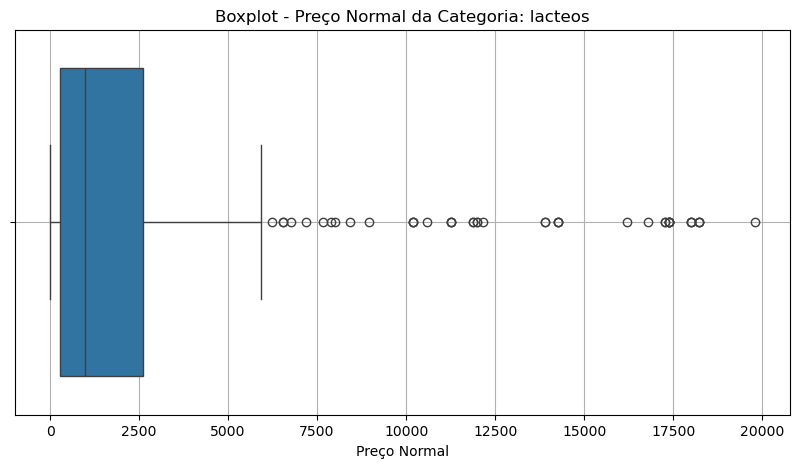

In [5]:
categoria_maior_std = preco_stats.sort_values("std", ascending=False).iloc[0]["Categoria"]
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df["Categoria"] == categoria_maior_std], x="Preco_Normal")
plt.title(f"Boxplot - Preço Normal da Categoria: {categoria_maior_std}")
plt.xlabel("Preço Normal")
plt.grid(True)
plt.show()

## Questão 4 - Gráfico de Barras da Média de Descontos por Categoria

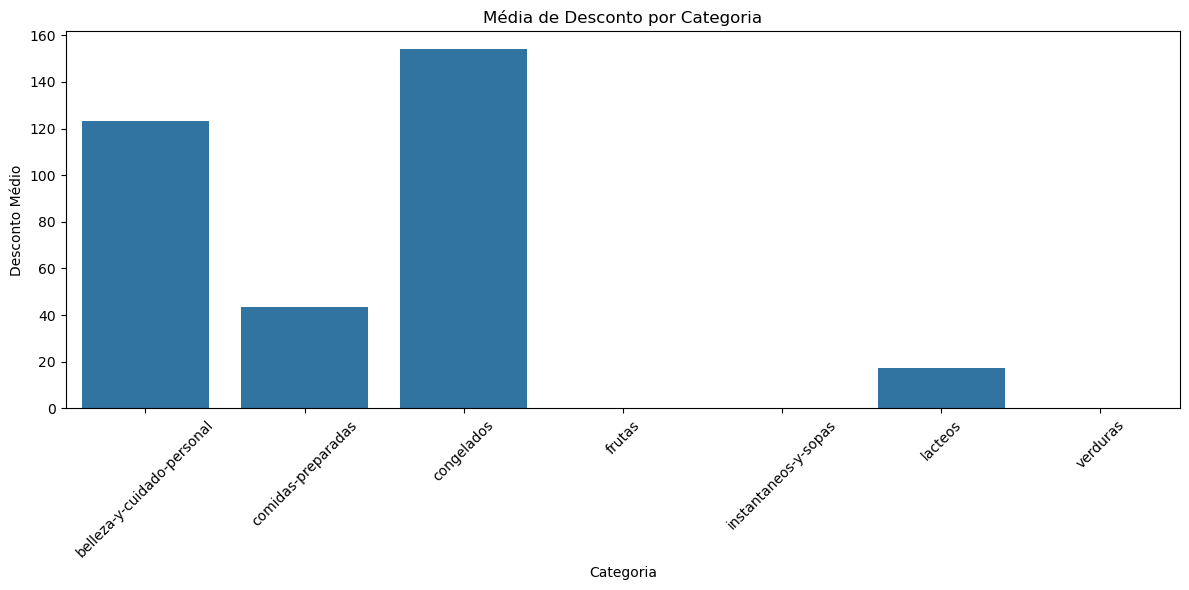

In [6]:
media_desconto_categoria = df.groupby("Categoria")["Desconto"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=media_desconto_categoria, x="Categoria", y="Desconto")
plt.xticks(rotation=45)
plt.title("Média de Desconto por Categoria")
plt.ylabel("Desconto Médio")
plt.tight_layout()
plt.show()

## Questão 5 - Gráfico Interativo com Descontos por Categoria e Marca

In [7]:
grupo_interativo = df.groupby(["Categoria", "Marca"])["Desconto"].mean().reset_index()
grupo_interativo_filtrado = grupo_interativo[grupo_interativo["Desconto"] > 0]

fig = px.treemap(grupo_interativo_filtrado,
                 path=["Categoria", "Marca"],
                 values="Desconto",
                 color="Desconto",
                 color_continuous_scale="Blues",
                 title="Média de Desconto por Categoria e Marca (valores > 0)")
fig.show()